In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('../data/demo/0000000000.png') # Read the test img
display(img.shape)

(512, 1392, 3)

In [18]:
IMAGE_H = img.shape[0]
IMAGE_W = img.shape[1]

In [40]:
src = np.float32([[0, IMAGE_H], [IMAGE_W, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[246, IMAGE_H], [IMAGE_W-246, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

In [43]:
display(M)

array([[1.00000000e+00, 7.43125000e-01, 0.00000000e+00],
       [0.00000000e+00, 1.54666667e+00, 0.00000000e+00],
       [0.00000000e+00, 1.06770833e-03, 1.00000000e+00]])

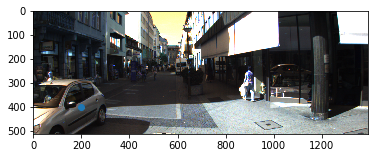

In [53]:
plt.imshow(img) # Show results
plt.scatter((200,), (400,), marker='o')

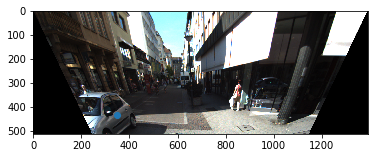

In [70]:

# img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results

plt.scatter((348,), (433,), marker='o')

plt.show()

In [69]:
transformed = np.dot(M, [200, 400, 1])
transformed[:2] / transformed[-1]

array([348.4379562 , 433.51824818])

In [63]:
np.matmul([[1, 2], [2, 3]], [[3, 4], [5, 6]])

array([[13, 16],
       [21, 26]])

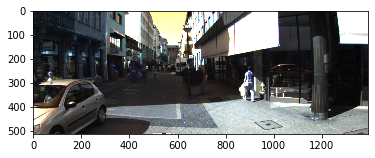

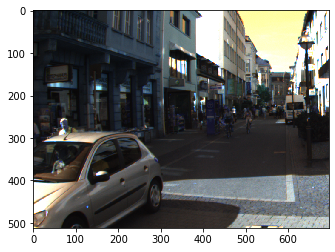

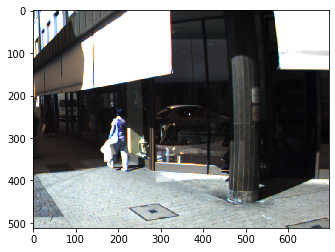

In [14]:
plt.imshow(img)
plt.show()
plt.imshow(img[:, :img.shape[1]//2])
plt.show()
plt.imshow(img[:, img.shape[1]//2:])
plt.show()

In [8]:
display(img.shape)
display(img.shape[1]/2)

(512, 1392, 3)

696.0

In [10]:
img[:, :img.shape[1]//2].shape

(512, 696, 3)

In [23]:
mid_x = img.shape[1]//2
left, right = img[:, :mid_x], img[:, mid_x:]
np.array([left, right]).shape

(2, 512, 696, 3)